In [23]:
import geopandas as gpd
from gerrychain import Graph
import maup

In [2]:
import pandas as pd

In [15]:
WACON = gpd.read_file("./wa_cong_adopted_2022/CONG_AMEND_FINAL.shp")
WASEN = gpd.read_file("./wa_sl_adopted_2022/LEG_AMEND_FINAL.shp")

In [3]:
bg_df = gpd.read_file("./wa_pl2020_bg/wa_pl2020_bg.shp")
#GEOID20

In [10]:
bg_project = pd.read_csv("./wa_bg_proj_P1_2020tiger/wa_bg_proj_P1_2020tiger/wa_bg_proj_P1_2020tiger.csv")
#geoid_2020

In [17]:
bg_cvap = pd.read_csv("./wa_cvap_2020_bg/wa_cvap_2020_bg.csv")
#GEOID

In [66]:
bg_project['p21_total']

0        725
1        857
2        388
3       1184
4        394
        ... 
5306     690
5307    2187
5308    2197
5309    2095
5310    1977
Name: p21_total, Length: 5311, dtype: int64

In [19]:
blocks = gpd.read_file("./wa_pl2020_b/wa_pl2020_b.shp")
#GEOID20

In [20]:
block_adjust = pd.read_csv("./wa_pl2020_b_official_adjusted/wa_2020_Redistricting_RCW4405140.csv")
#GEOID20

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
block_adjust.head()

GEOID20  TotalPop  GQPop  HHPop  WhiteAlNH  WhiteAlHi  BlackAlNH  \
0  530019501001000        11      0     11          8          0          0   
1  530019501001001         0      0      0          0          0          0   
2  530019501001002         0      0      0          0          0          0   
3  530019501001003         0      0      0          0          0          0   
4  530019501001004         0      0      0          0          0          0   

   BlackAlHi  AIANAlNH  AIANAlHi  ...  UNHOPIAlHi  UOtherAlNH  UOtherAlHi  \
0          0         0         0  ...           0           0           0   
1          0         0         0  ...           0           0           0   
2          0         0         0  ...           0           0           0   
3          0         0         0  ...           0           0           0   
4          0         0         0  ...           0           0           0   

   UTwoMoreNH  UTwoMoreHi  Adjusted  OrigFacBlk  DestBlk  PreSubtrct  PreAdd  
0           0           3       NaN         NaN      NaN         NaN     NaN  
1           0           0       NaN         NaN      NaN         NaN     NaN  
2           0           0       NaN         NaN      NaN         NaN     NaN  
3           0           0       NaN         NaN      NaN         NaN     NaN  
4           0           0       NaN         NaN      NaN         NaN     NaN  

[5 rows x 40 columns]

In [27]:
block_adjust[block_adjust['Adjusted']=='Y'][['TotalPop','UTotalPop']]

TotalPop  UTotalPop
310           26         25
315           13         12
366           13         12
422           31         30
438           31         29
...          ...        ...
158067       103        101
158068        52         51
158074        95         94
158076        86         84
158084        97         96

[9743 rows x 2 columns]

In [45]:
block_adjust['GEOID20']=block_adjust['GEOID20'].astype(str)
block_adjust2=block_adjust.set_index('GEOID20')
blocks['Adj_Pop'] = blocks['GEOID20'].map(block_adjust2['TotalPop'])

In [48]:
blocks[blocks['Adj_Pop']!=blocks['P0010001']][['P0010001','Adj_Pop']]

P0010001  Adj_Pop
7            197      198
17            19       20
41            85       86
75            75       76
87           105      106
...          ...      ...
158033        72       74
158034       155      156
158069        32       33
158083        16       17
158091        81       82

[9743 rows x 2 columns]

In [49]:
assignment = maup.assign(blocks, bg_df)

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


In [50]:
bg_df['Adj_Pop'] = blocks['Adj_Pop'].groupby(assignment).sum()

In [51]:
abg_df[bg_df['Adj_Pop']!=bg_df['P0010001']][['P0010001','Adj_Pop']]

P0010001  Adj_Pop
0         1016     1027
1         1124     1133
2         1148     1152
3          810      813
4         1106     1111
...        ...      ...
5306      1808     1811
5307       787      791
5308      1329     1334
5309       686      688
5310       881      885

[3959 rows x 2 columns]

In [52]:
max(bg_df['Adj_Pop']-bg_df['P0010001'])

232

In [53]:
list(bg_cvap.columns)

['GEOID',
 'NAME',
 'STATE',
 'COUNTY',
 'C_TOT20',
 'CTOTMOE',
 'C_NHS20',
 'CNHSMOE',
 'C_AIA20',
 'CAIAMOE',
 'C_ASN20',
 'CASNMOE',
 'C_BLK20',
 'CBLKMOE',
 'C_NHP20',
 'CNHPMOE',
 'C_WHT20',
 'CWHTMOE',
 'C_AIW20',
 'CAIWMOE',
 'C_ASW20',
 'CASWMOE',
 'C_BLW20',
 'CBLWMOE',
 'C_AIB20',
 'CAIBMOE',
 'C_2OM20',
 'C2OMMOE',
 'C_HSP20',
 'CHSPMOE',
 'CVAP_TOT20',
 'CVAPTOTMOE',
 'CVAP_NHS20',
 'CVAPNHSMOE',
 'CVAP_AIA20',
 'CVAPAIAMOE',
 'CVAP_ASN20',
 'CVAPASNMOE',
 'CVAP_BLK20',
 'CVAPBLKMOE',
 'CVAP_NHP20',
 'CVAPNHPMOE',
 'CVAP_WHT20',
 'CVAPWHTMOE',
 'CVAP_AIW20',
 'CVAPAIWMOE',
 'CVAP_ASW20',
 'CVAPASWMOE',
 'CVAP_BLW20',
 'CVAPBLWMOE',
 'CVAP_AIB20',
 'CVAPAIBMOE',
 'CVAP_2OM20',
 'CVAP2OMMOE',
 'CVAP_HSP20',
 'CVAPHSPMOE',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'BLKGRPCE']

In [58]:
bg_cvap['GEOID']=bg_cvap['GEOID'].astype(str)

In [59]:
bg_cvap2=bg_cvap.set_index('GEOID')
bg_df['C_TOT20'] = bg_df['GEOID20'].map(bg_cvap2['C_TOT20'])
bg_df['CVAP_TOT20'] = bg_df['GEOID20'].map(bg_cvap2['CVAP_TOT20'])

In [64]:
bg_project['geoid_2020'] = bg_project['geoid_2020'].astype(str)

In [67]:
bg_project=bg_project.set_index('geoid_2020')

for i in range(21,31):
    bg_df[f'proj{i}'] = bg_df['GEOID20'].map(bg_project[f'p{i}_total'])


In [69]:
bg_df['proj30']

0       1011
1       1610
2        918
3       1150
4       1708
        ... 
5306    2238
5307     804
5308    1607
5309     419
5310     591
Name: proj30, Length: 5311, dtype: int64

In [75]:
WACON = WACON.to_crs(bg_df.crs)
WASEN = WASEN.to_crs(bg_df.crs)
assignment = maup.assign(bg_df,WACON)
bg_df['WACON'] = assignment
assignment = maup.assign(bg_df,WASEN)
bg_df['WASEN'] = assignment

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPanda

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPanda

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPanda

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\maup\indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPanda

In [79]:
bg_df.to_file("./BG_Merged.shp")

In [80]:
graph = Graph.from_geodataframe(bg_df)

C:\Users\daryl\.conda\envs\JennerData\lib\site-packages\gerrychain\graph\graph.py:162: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()


In [81]:
graph.to_json("./BG_Merged.json")

In [82]:
graph.nodes[0]

{'boundary_node': True,
 'boundary_perim': 0.02653901619950623,
 'area': 0.0001455961484999928,
 'STATEFP20': '53',
 'COUNTYFP20': '003',
 'TRACTCE20': '960300',
 'BLKGRPCE20': '4',
 'GEOID20': '530039603004',
 'NAMELSAD20': 'Block Group 4',
 'MTFCC20': 'G5030',
 'FUNCSTAT20': 'S',
 'ALAND20': 968866,
 'AWATER20': 275518,
 'INTPTLAT20': '+46.4129919',
 'INTPTLON20': '-117.0383257',
 'FILEID': 'PLST',
 'STUSAB': 'WA',
 'SUMLEV': '150',
 'GEOVAR': '00',
 'GEOCOMP': '00',
 'CHARITER': '000',
 'LOGRECNO': '0002092',
 'GEOID': '1500000US530039603004',
 'GEOCODE': '530039603004',
 'REGION': '4',
 'DIVISION': '9',
 'STATE': '53',
 'STATENS': '01779804',
 'COUNTY': '003',
 'COUNTYCC': 'H1',
 'COUNTYNS': '01533502',
 'TRACT': '960300',
 'BLKGRP': '4',
 'CBSA': '30300',
 'MEMI': '1',
 'CSA': '999',
 'METDIV': '99999',
 'AREALAND': 968866,
 'AREAWATR': 275518,
 'BASENAME': '4',
 'NAME': 'Block Group 4',
 'FUNCSTAT': 'S',
 'POP100': 1016,
 'HU100': 467,
 'INTPTLAT': '+46.4129919',
 'INTPTLON': '-1

<AxesSubplot:>

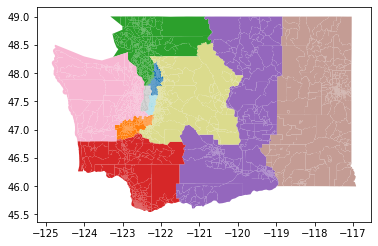

In [77]:
bg_df.plot(column='WACON',cmap='tab20')

<AxesSubplot:>

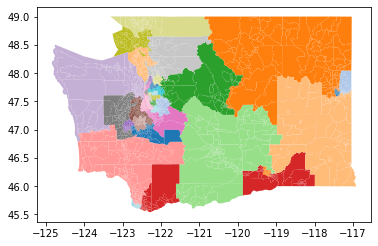

In [78]:
bg_df.plot(column='WASEN',cmap='tab20')